<a href="https://colab.research.google.com/github/j1ayizhao/datascienceA2/blob/main/Jiay_Zhao_Unit9Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 9 Project: Your first neural network


In this project I used a multi-layer non-linear neural network to predict the online popularity (number of shares) of Mashable's (a news website) news articles based on specific content features.

In [2]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
shares = pd.read_csv('https://raw.githubusercontent.com/j1ayizhao/datascienceA2/refs/heads/main/news_popularity%20-%20OnlineNewsPopularity.csv')
shares.drop(columns=["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus","data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world", "average_token_length", "num_self_hrefs"],inplace=True)

In [4]:
shares

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,kw_max_min,kw_avg_min,...,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,12,219,0.663594,4,1,0,5,0,0.0,0.000000,...,0,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.500000,-0.187500,593
1,9,255,0.604743,3,1,0,4,0,0.0,0.000000,...,0,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.000000,0.000000,711
2,9,211,0.575130,3,1,0,6,0,0.0,0.000000,...,0,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.000000,0.000000,1500
3,9,531,0.503788,9,1,0,7,0,0.0,0.000000,...,0,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.000000,0.000000,1200
4,13,1072,0.415646,19,20,0,7,0,0.0,0.000000,...,0,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.454545,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,13,1111,0.405505,2,3,0,6,-1,722.0,179.750000,...,0,0.294769,0.062160,0.020702,0.012601,0.621622,0.378378,0.250000,0.250000,749
786,11,0,0.000000,0,0,1,8,-1,1000.0,292.823750,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.500000,3500
787,14,485,0.509595,12,1,1,7,-1,952.0,269.166667,...,0,0.469045,0.119933,0.043299,0.010309,0.807692,0.192308,0.454545,0.136364,16800
788,13,311,0.611842,12,1,0,6,-1,151.0,24.333333,...,0,0.302350,0.002778,0.006431,0.019293,0.250000,0.750000,0.000000,0.000000,2000


My original dataset had 34 columns, so I made a new one keeping only the columns I believed were important. What each variable stands for:


*   n_tokens_content: number of words in the article
*   num_hrefs: number of links

*   title_sentiment_polarity: attitude (pos/neg) conveyed in the title






In [5]:
pop = shares[["n_tokens_content", "num_hrefs", "num_imgs", "num_videos", "title_sentiment_polarity", "global_rate_negative_words", "shares"]]

In [6]:
pop

,n_tokens_content,num_hrefs,num_imgs,num_videos,title_sentiment_polarity,global_rate_negative_words,shares
0,219,4,1,0,-0.187500,0.013699,593
1,255,3,1,0,0.000000,0.015686,711
2,211,3,1,0,0.000000,0.009479,1500
3,531,9,1,0,0.000000,0.020716,1200
4,1072,19,20,0,0.136364,0.012127,505
...,...,...,...,...,...,...,...
785,1111,2,3,0,0.250000,0.012601,749
786,0,0,0,1,-0.500000,0.000000,3500
787,485,12,1,1,0.136364,0.010309,16800
788,311,12,1,0,0.000000,0.019293,2000


I then made scatterplots of each variable to find correlations and see which ones I should include in the neural network. Turns out none of them showed a strong enough association with shares, but I kept the best 3 scatterplots. I ended up only using num_imgs and n_tokens_content because I thought adding 3 not very predictive variables wouldn't help my model.

I originally expected title_sentiment_polarity to be the most predictive but it didn't show any patterns at all which was surprising because I would expect more polarizing headlines to get more shares on the internet.

(0.0, 10000.0)

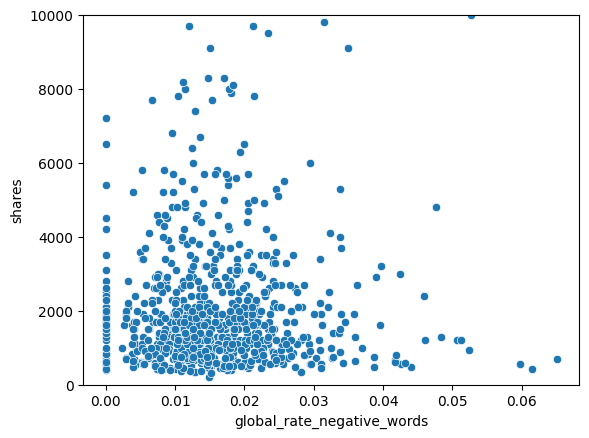

In [25]:
sns.scatterplot(data = shares, y = 'shares', x = 'global_rate_negative_words')
plt.ylim(0, 10000)


(0.0, 10000.0)

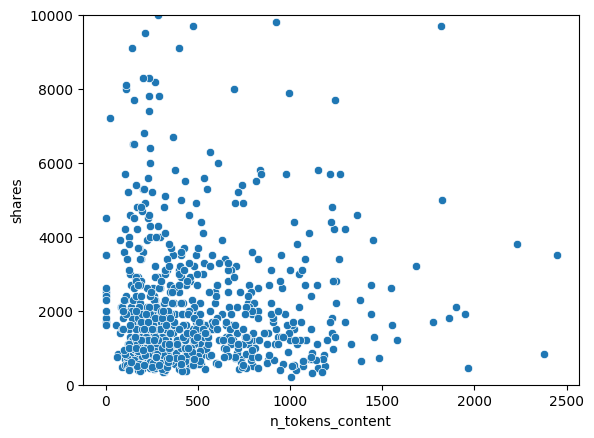

In [ ]:
sns.scatterplot(data = shares, y = 'shares', x = 'n_tokens_content')
plt.ylim(0, 10000)


(0.0, 10000.0)

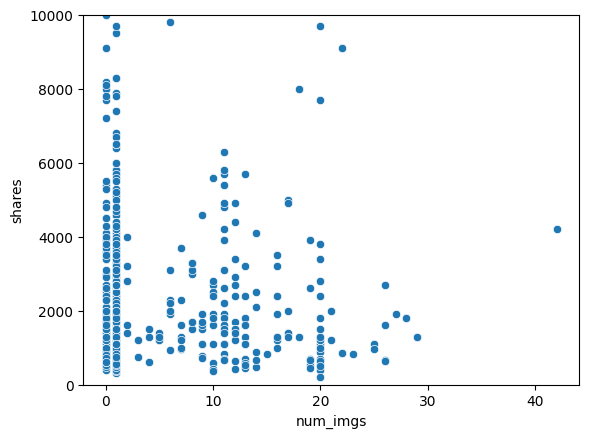

In [ ]:
sns.scatterplot(data = shares, y = 'shares', x = 'num_imgs')
plt.ylim(0, 10000)


In [7]:
predictors =  pop[["num_imgs", "n_tokens_content"]]
target = pop["shares"]

In [8]:
pre = predictors.to_numpy()
tar = target.to_numpy()

p = torch.from_numpy(pre)
t = torch.from_numpy(tar)

X = p.unsqueeze(dim=1)
y = t.unsqueeze(dim=1)


In [9]:
from sklearn.model_selection import train_test_split

On my first attempt at making this neural network, I used StandardScaler to scale my predictors but ended up with NaN for all my training losses. Then I applied the scaler to my estimand as well, and that helped with my training loss issue.

In [10]:
scaler = StandardScaler()
# Apply scaler directly to the predictors array p
p_scaled = scaler.fit_transform(p)
t_scaled = scaler.fit_transform(t.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(
    p_scaled, t_scaled, test_size=0.2,
)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

I ended up removing two hidden layers from my neural network (and keeping two) because having more layers actually made me have larger training losses, and the model was worse at capturing the relationship from the looks of the graph. I found it surprising that a simpler model worked better, because the relationship between my variables and estimand doesn't seem to be fairly linear or straightforward.

In [19]:
# Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    #our input has 2 dimensions, so 2 diminsions.
    nn.Linear(in_features=2, out_features=32,), # Input layer with 2 features from the data
    nn.RReLU(),

    # Output layer
    nn.Linear(in_features=32, out_features=1, ), # Input features should match the output features of the previous layer (32)
    #outputs a vector of predicted weights
)

In [20]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent



In [21]:
epochs = 2000
for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_1.train()

    # 1. Forward pass; makes predictions
    y_pred = model_1(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_1.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_1(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 1.22174, Test loss: 0.44377
Epoch: 200 | Train loss: 1.20655, Test loss: 0.42642
Epoch: 400 | Train loss: 1.19628, Test loss: 0.41380
Epoch: 600 | Train loss: 1.18675, Test loss: 0.40446
Epoch: 800 | Train loss: 1.18197, Test loss: 0.39745
Epoch: 1000 | Train loss: 1.17782, Test loss: 0.39213
Epoch: 1200 | Train loss: 1.17399, Test loss: 0.38802
Epoch: 1400 | Train loss: 1.17087, Test loss: 0.38483
Epoch: 1600 | Train loss: 1.16883, Test loss: 0.38231
Epoch: 1800 | Train loss: 1.16750, Test loss: 0.38030


In [22]:
# Turn on evaluation mode
model_1.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_1(X_test)

(-1.0, 4.0)

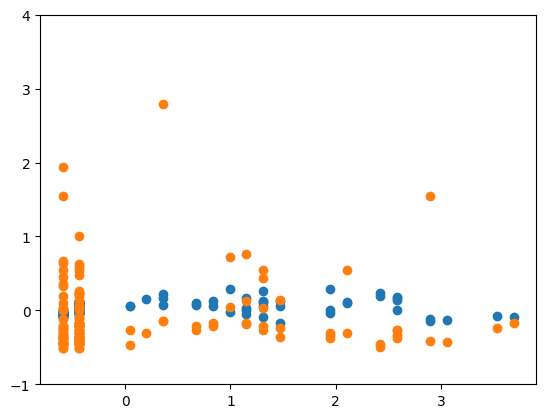

In [23]:
#plots predictions--remember, our model has never seen X_test
# Select the first column of X_test for plotting against predictions
plt.scatter(X_test.detach().numpy()[:, 0],y_preds.detach().numpy())

#plots test data
# Select the first column of X_test for plotting against the actual test data
plt.scatter(X_test.detach().numpy()[:, 0],y_test.detach().numpy())
y_min = -1
y_max = 4
plt.ylim(y_min, y_max)

The model shows that the predicted points follow a general trend similar to the actual data, but still doesn't capture all of the underlying relationships. This tells me that maybe I should add more input features, but the ones I used were already the most predictive ones (which I observed from the scatterplots). Another limitation with this model is that all my predictions are scaled ( which I had to do to get fewer training losses) which makes it hard to compare to real world values. Maybe there is a way to re-scale the predictions to be able to see what the values actually are.